In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import healpy as hp
import numpy as np
import h5py, os
import matplotlib.pyplot as plt
import scipy.stats

from msfm.utils import files, maps

In [15]:
n_side = 512
n_pix = hp.nside2npix(n_side)

out_dir = "/Users/arne/polybox/_PhD/23_HS/Conferences & Presentations/Meetings/230901"

In [20]:
map_file = "/Users/arne/data/DESY3/CosmoGrid/fiducial/cosmo_fiducial/perm_0000/projected_probes_maps_nobaryons512.h5"

kgs = []
dgs = []
z_bins = ['desy3metacal1', 'desy3metacal2', 'desy3metacal3', 'desy3metacal4']
with h5py.File(map_file, "r") as f:
    for z_bin in z_bins:
        kgs.append(f[f"kg/{z_bin}"][:])
        dgs.append(f[f"dg/{z_bin}"][:])


kgs = np.stack(kgs, axis=-1)
dgs = np.stack(dgs, axis=-1)

kgs = (kgs - np.mean(kgs, axis=0, keepdims=True))/np.mean(kgs, axis=0, keepdims=True)
dgs = (dgs - np.mean(dgs, axis=0, keepdims=True))/np.mean(dgs, axis=0, keepdims=True)


In [21]:
kg = kgs[:,0]
dg = dgs[:,0]
np_seed = 10
n_side = 512

# addition first
cl = hp.anafast(kg + dg)
np.random.seed(np_seed)
add_first = hp.synfast(cl, nside=n_side)

# cl first
cl1 = hp.anafast(kg)
cl2 = hp.anafast(dg)
np.random.seed(np_seed)
cl_first_1 = hp.synfast(cl1, nside=n_side)
np.random.seed(np_seed)
cl_first_2 = hp.synfast(cl2, nside=n_side)
cl_first = cl_first_1 + cl_first_2

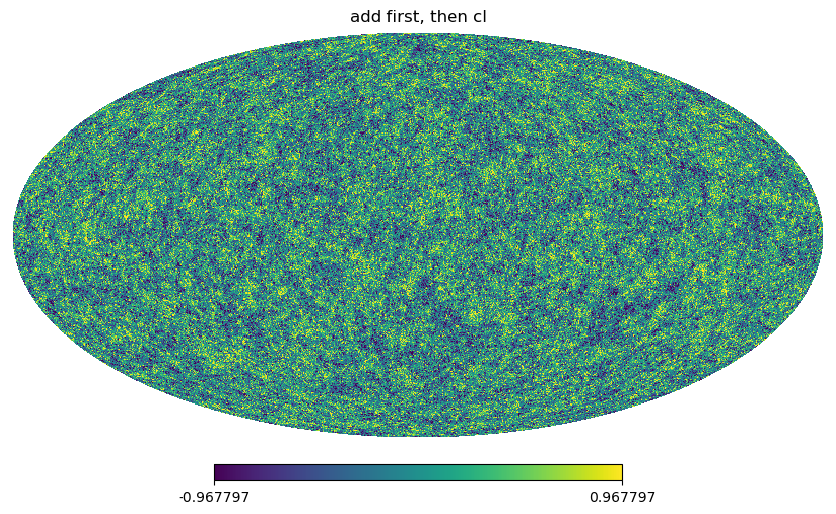

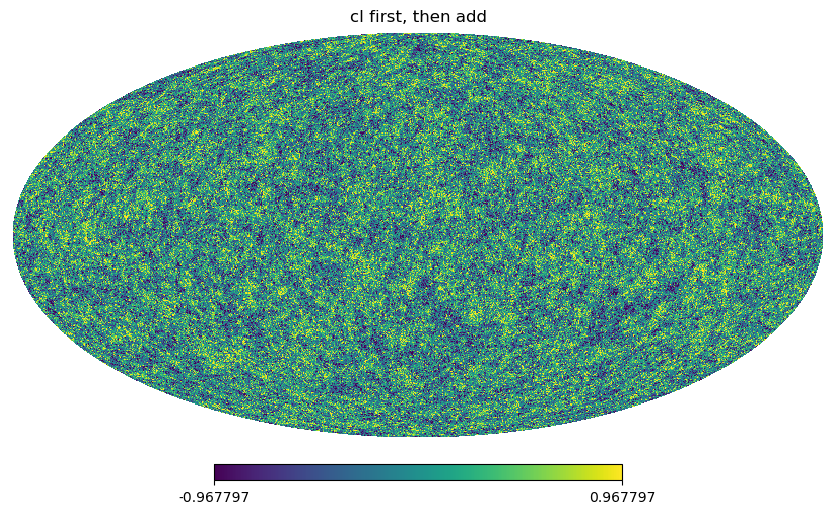

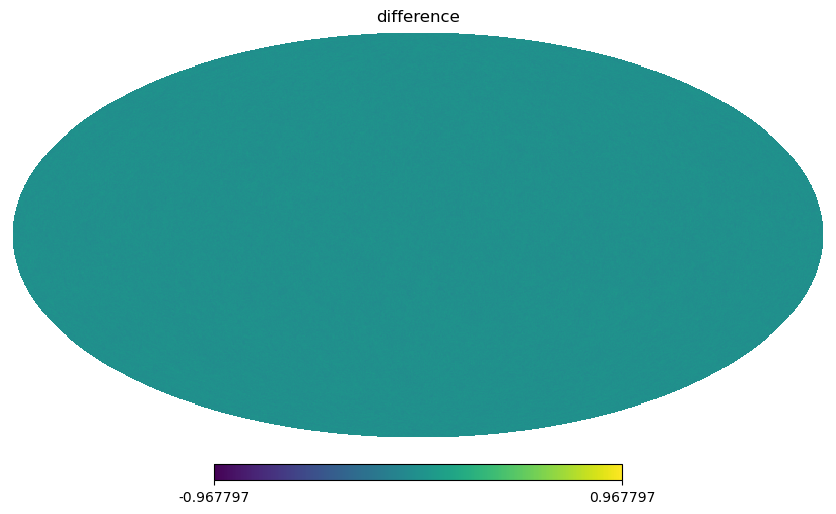

In [22]:
# vmin = np.min(add_first)
# vmax = np.max(add_first)

vmax = np.quantile(np.abs(add_first), 0.95)
vmin = - vmax

hp.mollview(add_first, title="add first, then cl", min=vmin, max=vmax)
hp.mollview(cl_first, title="cl first, then add", min=vmin, max=vmax)
hp.mollview(add_first - cl_first, title="difference", min=vmin, max=vmax)

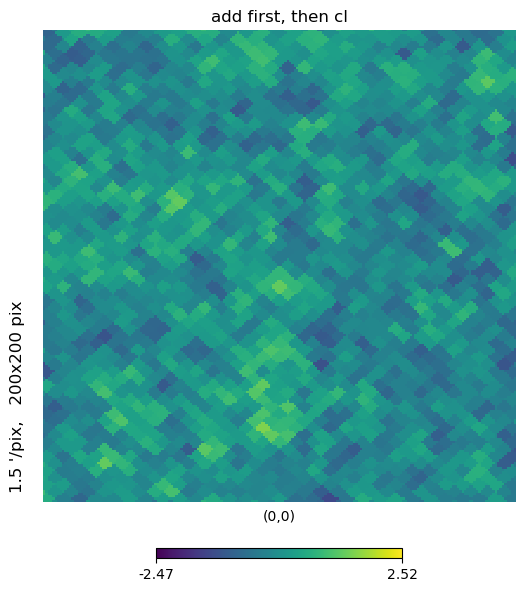

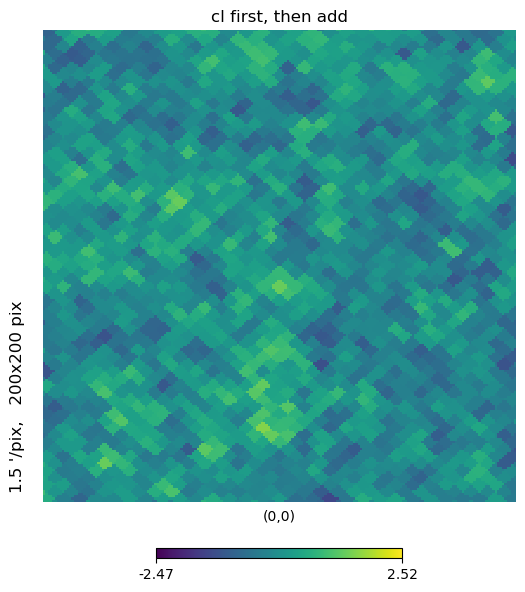

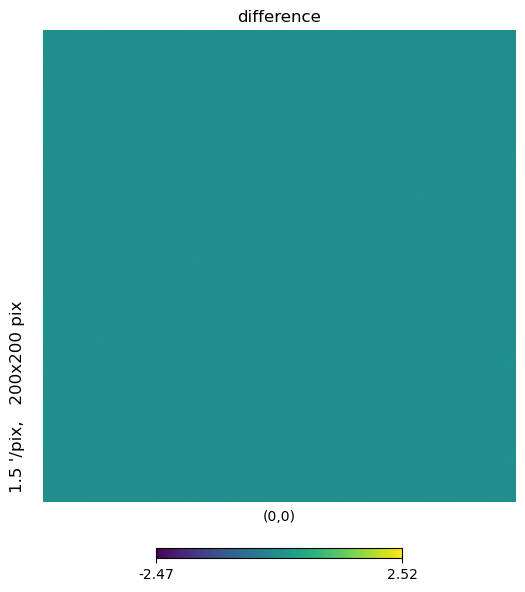

In [23]:
vmin = np.min(add_first)
vmax = np.max(add_first)

hp.gnomview(add_first, title="add first, then cl", min=vmin, max=vmax)
hp.gnomview(cl_first, title="cl first, then add", min=vmin, max=vmax)
hp.gnomview(add_first - cl_first, title="difference", min=vmin, max=vmax)